# 3104 Assignment 1
### [30 Marks, 20%]

## Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# You may need some sklearn specific imports, or other standard toolboxes

## Load dataset

In [2]:
trainingset = np.loadtxt('training.csv', delimiter=',')
testingset = np.loadtxt('test.csv', delimiter=',')

trainingset

array([[ 70.,  80.,  82., ...,   0.,   0.,   0.],
       [151., 150., 147., ...,   0.,   0.,   0.],
       [231., 212., 156., ...,   0.,   0.,   0.],
       ...,
       [ 74.,  81.,  87., ...,   1.,   0.,   0.],
       [222., 227., 203., ...,   0.,   0.,   0.],
       [195., 199., 205., ...,   1.,   0.,   0.]])

## Split data

In [3]:
n_inputs = 2304 # images are 48 x 48
n_classes = 7 # 7 classes - as defined below
img_dim = 48 # each input image dimension, width and height are both 48

x_training = trainingset[:, 0:n_inputs] # Extract the first 2304 elements - the image
y_training = trainingset[:, n_inputs:n_inputs + n_classes] # Extract the last 7 elements - a one hot category encoding

x_testing = testingset[:, 0:n_inputs] # Extract the first 2304 elements - the image
y_testing = testingset[:, n_inputs:n_inputs + n_classes] # Extract the last 7 elements - a one hot category encoding

x_training = x_training.reshape(x_training.shape[0], 48, 48) # Make samples image shaped
x_testing = x_testing.reshape(x_testing.shape[0], 48, 48) # Make samples image shaped

In [4]:
def get_emotion(whichemotion):
    if whichemotion.shape[0] == 1:
        indx = whichemotion[0]
    else:
        indx = np.argmax(whichemotion)
    if indx == 0:
        return 'angry'
    elif indx == 1:
        return 'disgust'
    elif indx == 2:
        return 'fear'
    elif indx == 3:
        return 'happy'
    elif indx == 4:
        return 'sad'
    elif indx == 5:
        return 'surprise'
    elif indx == 6:
        return 'neutral'

(28709, 48, 48)
(28709, 7)
(3589, 48, 48)
(3589, 7)


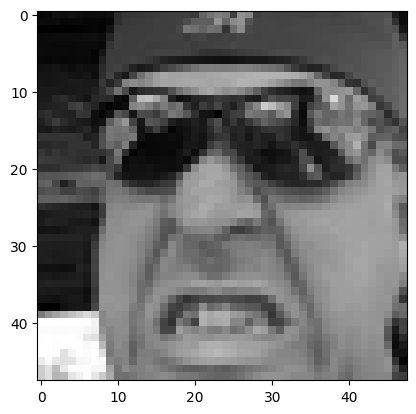

facial emotion: angry


In [5]:
print(x_training.shape)
print(y_training.shape)

print(x_testing.shape)
print(y_testing.shape)

sampleindex = np.random.randint(0,1000)
sample = x_training[sampleindex, :]
sample = sample.reshape(48, 48)

plt.imshow(sample, cmap='gray')
plt.show()
print('facial emotion: %s' % get_emotion(y_training[sampleindex, :]))

# Part I : Happy or Sad

## For this part you will consider a binary classification problem - categorizing faces as happy or sad

[1 Mark] a. Sample from the data loaded above to include only the happy or sad cases

In [6]:
import pandas as pd

def sample_dataset(x, y, emotions):
    sample_x = []
    sample_y = []
    
    for i, y_instance in enumerate(y):
        emotion = get_emotion(y_instance)
        if emotion in emotions:
            sample_x.append(list(x[i]))
            sample_y.append(emotions.index(emotion))
    
    return np.array(sample_x), np.array(sample_y)

sample_x_train, sample_y_train = sample_dataset(x_training, y_training, ['happy', 'sad'])
sample_x_test, sample_y_test = sample_dataset(x_testing, y_testing, ['happy', 'sad'])

In [7]:
sample_x_train.shape

(12045, 48, 48)

[4 Marks] b. Apply PCA and LDA to represent the faces, display a sample of a few faces for each case. You may consider using one or both of these in the steps that follow if they are of any value (this is for you to decide).

In [141]:
from sklearn.decomposition import PCA

def get_components_from_pca(x, y, n_components=0.8):
    
    x_fit = [face.flatten() for face in x]
    pca = PCA(n_components=n_components)
    pca.fit(x_fit)

    return pca.components_

pca_components = get_components_from_pca(sample_x_train, sample_y_train)
pca_components.shape

(31, 2304)

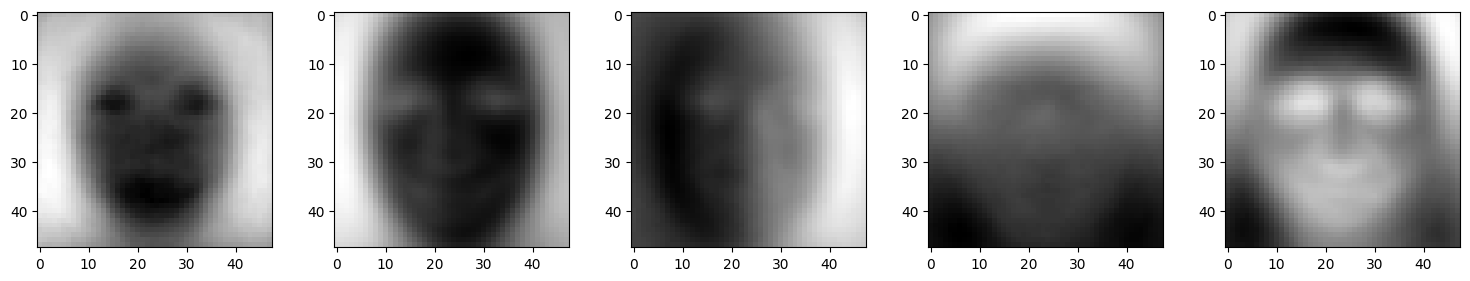

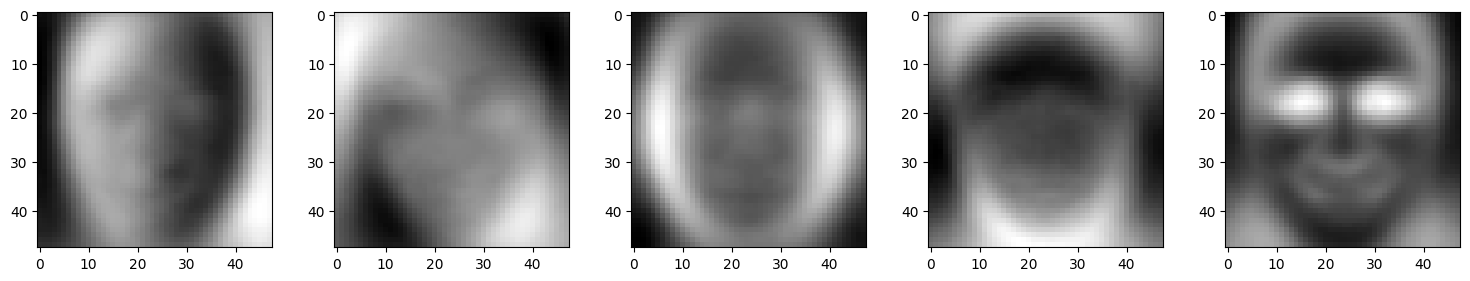

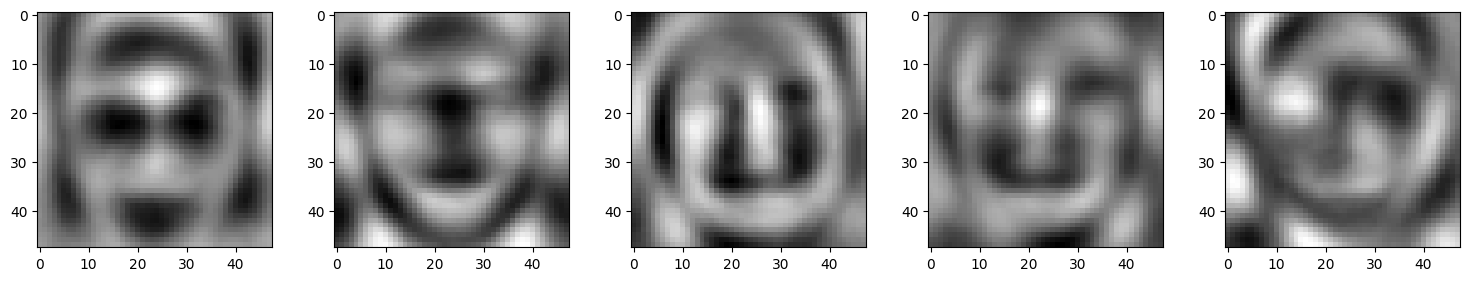

In [142]:
import math

def represent_face_using_pca(components, n_component, rows_cols, image_dimensions=(48, 48), cmap="gray"):
    
    plt.subplot(rows_cols[0], rows_cols[1], n_component+1)
    plt.imshow(components[n_component].reshape(image_dimensions), cmap=cmap)

def represent_x_faces_using_pca(components, x, image_dimensions=(48, 48), cmap="gray", faces_per_row=5, subplots_size=(15,15)):
    
    cols = min(x, faces_per_row)
    rows = math.ceil(x / faces_per_row)
    
    fig, axs = plt.subplots(rows, cols, figsize=subplots_size)
    fig.tight_layout()
    
    for i in range(x):
        represent_face_using_pca(components, i, rows_cols=(rows, cols), image_dimensions=image_dimensions, cmap=cmap)
    plt.show()

represent_x_faces_using_pca(pca_components, x = 5)
represent_x_faces_using_pca(pca_components[5:], x = 5)
represent_x_faces_using_pca(pca_components[-5:], x = 5)

In [143]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

def get_components_from_lda(x, y, n_components=0.8):
    
    pca = PCA(n_components=n_components)
    x_fit = [x_instance.flatten() for x_instance in x]
    x_pca = pca.fit_transform(x_fit)


    lda = LDA(solver='eigen')
    x_lda = lda.fit_transform(x_pca, y)
    
    lda_components = lda.scalings_.T
    return pca, lda_components

pca, lda_components = get_components_from_lda(sample_x_train, sample_y_train)
lda_components.shape

(31, 31)

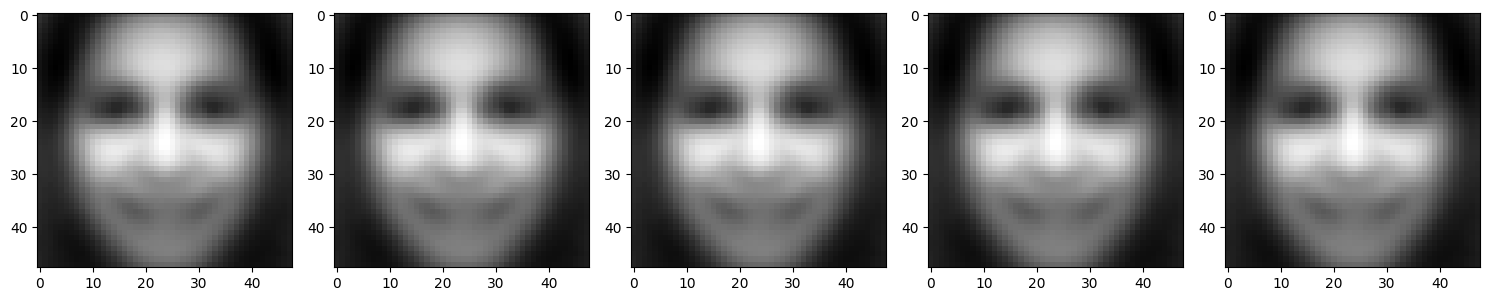

In [144]:
def represent_face_using_lda(faces, n_face, rows_cols, image_dimensions=(48, 48), cmap="gray"):
    
    plt.subplot(rows_cols[0], rows_cols[1], n_face+1)
    plt.imshow(faces[n_face].reshape(image_dimensions), cmap=cmap)

def represent_x_faces_using_lda(faces, x, image_dimensions=(48, 48), cmap="gray", faces_per_row=5, subplots_size=(15,15)):
    
    cols = min(x, faces_per_row)
    rows = math.ceil(x / faces_per_row)
    
    fig, axs = plt.subplots(rows, cols, figsize=subplots_size)
    
    for i in range(x):
        represent_face_using_lda(faces, i, rows_cols=(rows, cols), image_dimensions=image_dimensions, cmap=cmap)
    
    fig.tight_layout()
    plt.show()

faces = pca.inverse_transform(lda_components)
represent_x_faces_using_lda(faces, x = 5)

[2 Marks] c. Apply naive Bayes to classify faces as happy or sad. Report your accuracy.

In [167]:
def flatten_image_dataset(dataset):
    return np.array([list(instance.flatten()) for instance in dataset])

flat_x_train = flatten_image_dataset(sample_x_train)
flat_y_train = flatten_image_dataset(sample_y_train).ravel()
flat_x_test = flatten_image_dataset(sample_x_test)
flat_y_test = flatten_image_dataset(sample_y_test).ravel()
flat_x_test.shape

(1548, 2304)

In [184]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score

# function to train a model
def train_model(model, x_train, y_train, x_test):
    model_fitted = model.fit(x_train, y_train)
    display(model_fitted)
    y_pred_train = model_fitted.predict(x_train)
    y_pred_test = model_fitted.predict(x_test)
    return y_pred_train, y_pred_test

# function to display the classification model metrics
def display_classifier_metrics(y_train, y_pred_train, y_test, y_pred_test):
    print(f"Acuracy Score Train: {accuracy_score(y_train, y_pred_train):.4f}")
    print(f"Acuracy Score Test: {accuracy_score(y_test, y_pred_test):.4f}")
    print(f"F1 Score Train: {f1_score(y_train, y_pred_train):.4f}")
    print(f"F1 Score Test: {f1_score(y_test, y_pred_test):.4f}", end='\n\n')

gnb = GaussianNB()
y_pred_train, y_pred_test = train_model(gnb, flat_x_train, flat_y_train, flat_x_test)
display_classifier_metrics(flat_y_train, y_pred_train, flat_y_test, y_pred_test)

GaussianNB()

Acuracy Score Train: 0.6012
Acuracy Score Test: 0.5904
F1 Score Train: 0.5095
F1 Score Test: 0.5123



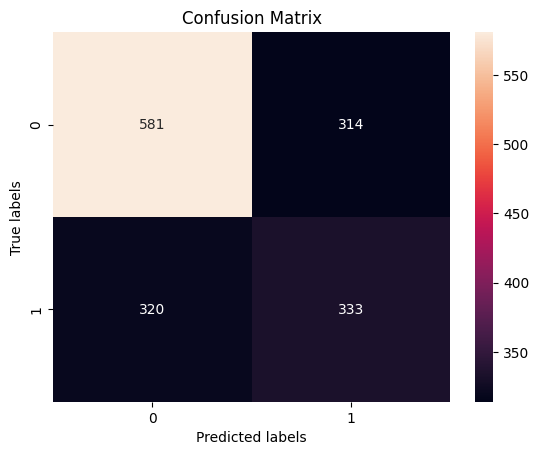

In [193]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_test, y_pred_test, labels=None):
    # set the confusion matrix
    matrix = confusion_matrix(y_test, y_pred, labels=labels)
    
    # plot the heatmap and set labels
    sns.heatmap(matrix, annot=True, fmt="d")
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.title("Confusion Matrix")
    plt.show()

plot_confusion_matrix(flat_y_test, y_pred_test)

In [195]:
from sklearn.model_selection import GridSearchCV

def hyperparameter_tuning(model, param_grid, x_train, x_test, y_train, y_test):
    # instantiate grid search cross validation and fit it with training data
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)
    grid_search.fit(x_train, y_train)
 
    # print best hyperparameters and accuracy score found
    model_name = type(model).__name__ # extract the model name
    print("Model:", model_name)
    print("- Best Hyperparameters: ", grid_search.best_params_)
    print("- Best Accuracy Score: {:.2f} %".format(grid_search.best_score_ * 100))
    best_model = grid_search.best_estimator_
    test_accuracy = best_model.score(x_test, y_test)
    print("- Test Accuracy Score: {:.2f} %".format(test_accuracy * 100))
    
    # return the best model
    return best_model

param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}
hyperparameter_tuning(gnb, param_grid, flat_x_train, flat_x_test, flat_y_train, flat_y_test)

Model: GaussianNB
- Best Hyperparameters:  {'var_smoothing': 0.533669923120631}
- Best Accuracy Score: 60.68 %
- Test Accuracy Score: 58.79 %


GaussianNB(var_smoothing=0.533669923120631)

In [196]:
results_NB = pd.DataFrame(gnb.cv_results_['params'])
results_NB['test_score'] = gnb.cv_results_['mean_test_score']

AttributeError: 'GaussianNB' object has no attribute 'cv_results_'

[2 Marks] d. Apply Logistic regression to classify faces as happy or sad. Report the accuracy.

In [9]:
# YOUR CODE HERE

[2 Marks] e. Apply a Support Vector Machine to classify the faces as happy or sad. Choose parameters / arguments to try to maximize your accuracy. Report the accuracy.

In [10]:
# YOUR CODE HERE

[1 Mark] f. Which of the approaches above allow you to reliably determine the degree of happiness or sadness (i.e. how happy or how sad)? Which do you trust the most?

YOUR ANSWER HERE

[2 Marks] g. Based on your answer to f. show the 5 happiest faces and the 5 saddest faces.

In [11]:
# YOUR CODE HERE

# Part II : Multi-class

## For this part you will repeat the tasks in Part I, but instead consider the multi-class problem and classify inputs according to all 7 classes. 

[4 Marks] a. Apply PCA and LDA to represent the faces, display a sample of a few faces for each case. Produce a plot for PCA showing the cumulative variance captured by adding additional principal components (e.g. 1st PC, 1st + 2nd PC, etc.). On the same figure, plot the same curve for only happy and sad faces used in part 1.

In [12]:
# YOUR CODE HERE

[2 Marks] b. Classify the faces using Naive Bayes and report your accuracy.

In [13]:
# YOUR CODE HERE

Visualize the results of your classifier on the test set using a confusion matrix. Describe briefly how the multi-class nature of the problem is treated by the classifier.
DESCRIBE BRIEFLY HERE

In [14]:
# YOUR CODE HERE

[2 Marks] c. Classify the faces using logistic regression and report your accuracy.

In [15]:
# YOUR CODE HERE

Visualize the results of your classifier on the test set using a confusion matrix. Describe briefly how the multi-class nature of the problem is treated by the classifier.
DESCRIBE BRIEFLY HERE

In [16]:
# YOUR CODE HERE

[2 Marks] d. Classify the faces using a support vector machine and report your accuracy.

In [17]:
# YOUR CODE HERE

Visualize the results of your classifier on the test set using a confusion matrix. Describe briefly how the multi-class nature of the problem is treated by the classifier.
DESCRIBE BRIEFLY HERE

[2 Marks] e. Which categories of faces seem to be most similar or least similar?
EXPLAIN HERE

[4 Marks] f. Let's assume that some of the faces were labeled wrong in producing the dataset. Propose and implement a solution that identifies images that are potentially mislabeled. Show 10 samples based on the method you choose.

In [18]:
# YOUR CODE HERE

# Optional

From all the classification approaches considered above, choose one to score faces based on a continuous valued prediction of for each of the categories.

[No Marks] a. Produce a prediction for each face in the test set (this has 7 dimensions). Visualize these based on a 2D embedding of the scores. The "data points" plotted in the embedding should show the actual picture of the face, at the corresponding 2D point location. (You could consider using t-SNE for your embedding)

In [19]:
# YOUR CODE HERE